# Gradient Descent on $(3x + 2)^2$

We derive the gradient analytically and then perform gradient descent one step at a time
so that re-running the update cell shows the sequence of iterates.

## Visualizing $f(x)$

The plot below shows the quadratic landscape over a wide range of x values.

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def f(x: float) -> float:
    """Objective function f(x) = (3x + 2)^2."""
    return (3 * x + 2) ** 2


print('Objective function ready to plot.')

Objective function ready to plot.


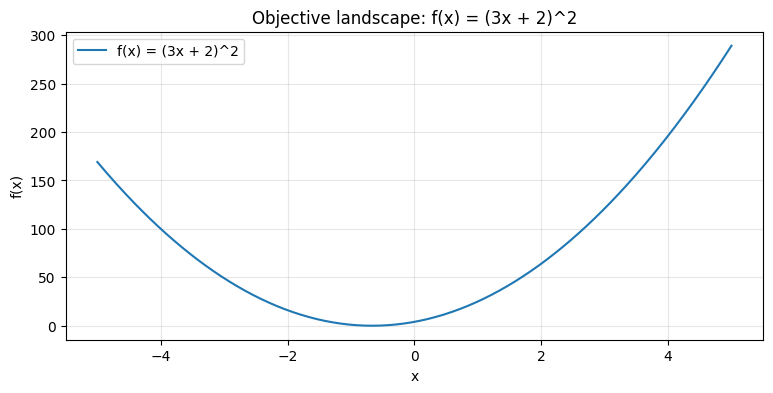

In [7]:
xs = np.linspace(-5, 5, 400)
ys = f(xs)

plt.figure(figsize=(9, 4))
plt.plot(xs, ys, label='f(x) = (3x + 2)^2')
plt.title('Objective landscape: f(x) = (3x + 2)^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()

## Deriving $f'(x)$

We start from the original objective:

$$f(x) = (3x + 2)^2$$

Apply the chain rule. Let the outer function be $g(u) = u^2$ and the inner function
$h(x) = 3x + 2$, so that $f(x) = g(h(x))$. The chain rule states

$$f'(x) = g'(h(x)) \cdot h'(x).$$

Compute each derivative separately:

$$g'(u) = 2u, \quad h'(x) = 3.$$

Combine them to obtain

$$f'(x) = 2(3x + 2) \cdot 3 = 6(3x + 2) = 18x + 12.$$

In [8]:
def grad_f(x: float) -> float:
    """Analytical derivative f'(x) = 18x + 12."""
    return 18 * x + 12


def plot_landscape(points=None, connect_points=False, x_min=-5.0, x_max=5.0, title=None):
    """Plot f(x) over [x_min, x_max] and optionally overlay points/history."""
    xs = np.linspace(x_min, x_max, 400)
    ys = f(xs)
    fig, ax = plt.subplots(figsize=(9, 4))
    ax.plot(xs, ys, label='f(x)')

    if points is not None and len(points) > 0:
        pts = np.array(points, dtype=float)
        ys_pts = f(pts)
        if connect_points and len(pts) > 1:
            ax.plot(pts, ys_pts, color='C1', linestyle='--', marker='o', label='history')
        else:
            ax.scatter(pts, ys_pts, color='C1', s=70, label='points', zorder=3)
        ax.scatter([pts[-1]], [ys_pts[-1]], color='C3', s=90, label='current x_t', zorder=4)

    if title:
        ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(alpha=0.3)
    ax.legend(loc='best')
    plt.show()


print("Gradient and plotting utilities ready.")

Gradient and plotting utilities ready.


## Configure gradient descent

Set the learning rate and the starting point $x_0$, then run the cell to initialize
the state variables used by the single-step updates. Re-run this cell whenever you
want to reset the process with different hyperparameters.

In [9]:
learning_rate = 0.1
x0 = 4.0

x_t = float(x0)
history = [x_t]
iteration = 0

print(f'Starting gradient descent at x0 = {x_t:.6f}')
print(f'Current f(x0) = {f(x_t):.6f}')
print(f'Learning rate = {learning_rate}')

Starting gradient descent at x0 = 4.000000
Current f(x0) = 196.000000
Learning rate = 0.1


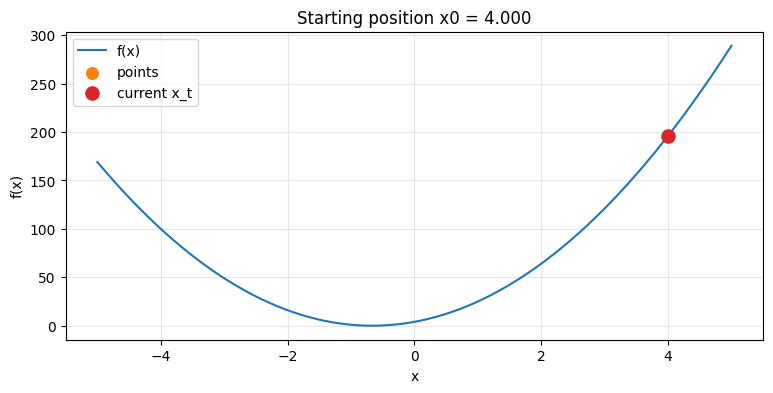

In [10]:
try:
    x_t
except NameError as exc:
    raise RuntimeError('Run the configuration cell before plotting the starting point.') from exc

plot_landscape(points=[x_t], x_min=-5, x_max=5,
               title=f'Starting position x0 = {x_t:.3f}')

## Run a single gradient descent step

Execute the next cell repeatedly to observe the sequence $x_t$. Each run uses the
current state, applies one gradient-descent update $x_{t+1} = x_t - \eta f'(x_t)$,
and appends the new position to the history.

Iteration 17
x_t = -0.771751
f(x_t) = 0.099384
History: 4.000000, -4.400000, 2.320000, -3.056000, 1.244800, -2.195840, 0.556672, -1.645338, 0.116270, -1.293016, -0.165587, -1.067530, -0.345976, -0.923219, -0.461424, -0.830860, -0.535312, -0.771751


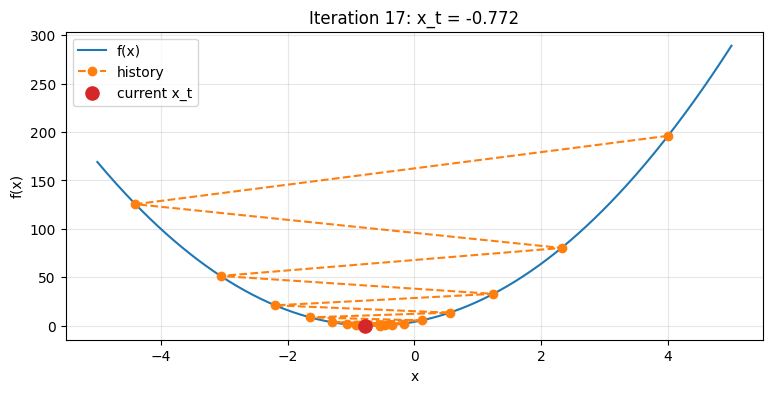

In [30]:
try:
    x_t
    history
    iteration
except NameError as exc:
    raise RuntimeError('Please run the initialization cell before taking steps.') from exc

grad = grad_f(x_t)
x_t = x_t - learning_rate * grad
iteration += 1
history.append(x_t)

print(f'Iteration {iteration}')
print(f'x_t = {x_t:.6f}')
print(f'f(x_t) = {f(x_t):.6f}')
print('History:', ', '.join(f"{value:.6f}" for value in history))

try:
    history
    iteration
except NameError as exc:
    raise RuntimeError('Run the step cell before plotting the trajectory.') from exc

plot_landscape(points=history, connect_points=True, x_min=-5, x_max=5,
               title=f'Iteration {iteration}: x_t = {x_t:.3f}')